In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np

plt.style.use('ggplot')
seed = 102
np.random.seed(seed)

Define the target function. Although it's a simple function, we should assume that it's a black box we can't look into.

In [2]:
def target(x):
    return x*np.sin(x)

X = np.linspace(-2, 10, 1000).reshape(-1,1)
y = target(X)

Choose two random samples between the bounds (-2,10), train a gaussian process regressor, generate predictions, and plot the results.

In [3]:
X_sample = np.random.uniform(-2, 10, 2).reshape(-1,1)
y_sample = target(X_sample)

gp = GaussianProcessRegressor().fit(X_sample, y_sample)
mu, std = gp.predict(X, return_std=True)

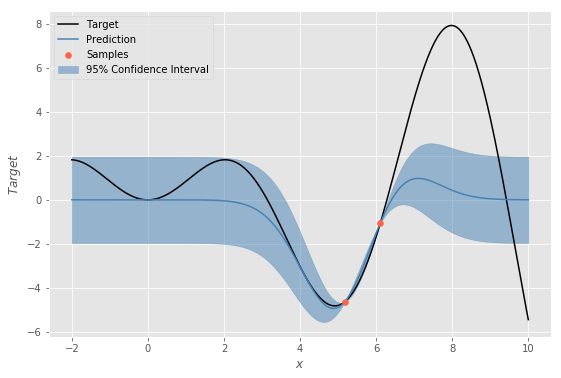

In [4]:
plt.figure(figsize=(9,6))
plt.plot(X, y, color='black', label='Target')
plt.scatter(X_sample, y_sample, color='tomato', zorder=20, label='Samples')
plt.plot(X, mu, color='steelblue', label='Prediction')
plt.fill_between(X.ravel(), mu.ravel()-1.96*std, mu.ravel()+1.96*std, color='steelblue', alpha=0.5, label='95% Confidence Interval')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$Target$')
plt.show()

Add three new samples, retrain gp, generate predictions, and plot results.

In [5]:
X_sample = np.vstack((X_sample, np.random.uniform(-2, 10, 3).reshape(-1,1)))
y_sample = target(X_sample)

gp = GaussianProcessRegressor().fit(X_sample, y_sample)
mu, std = gp.predict(X, return_std=True)

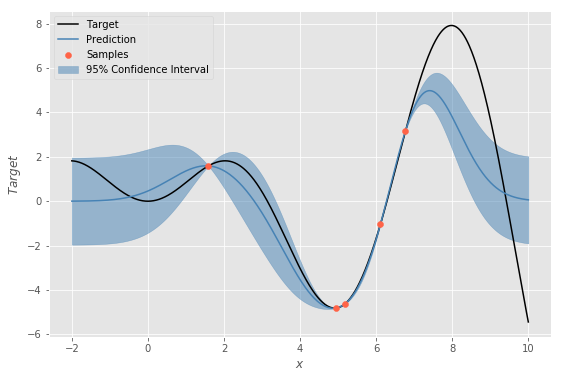

In [6]:
plt.figure(figsize=(9,6))
plt.plot(X, y, color='black', label='Target')
plt.scatter(X_sample, y_sample, color='tomato', zorder=20, label='Samples')
plt.plot(X, mu, color='steelblue', label='Prediction')
plt.fill_between(X.ravel(), mu.ravel()-1.96*std, mu.ravel()+1.96*std, color='steelblue', alpha=0.5, label='95% Confidence Interval')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$Target$')
plt.show()

Now let's create a two-dimensional target function.

In [7]:
def gaussian(x, y, x0=0.5, y0=0, sigma=1):
    d = np.sqrt((x-x0)**2 + (y-y0)**2)
    return np.exp(-(d**2/(2.0*sigma**2)))

x, y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
z = gaussian(x, y)

In [8]:
X_sample = np.random.uniform(-1, 1, size=(3,2))
z_sample = gaussian(X_sample[:,0], X_sample[:,1])

gp = GaussianProcessRegressor().fit(X_sample, z_sample)
mu, std = gp.predict(np.hstack((x.reshape(-1,1), y.reshape(-1,1))), return_std=True)

mu, std = mu.reshape(100,100), std.reshape(100,100)

In [9]:
for angle in np.arange(0, 360, 5):
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(x, y, z, rstride=8, cstride=8, color='black', lw=1, alpha=0.5)
    ax.plot_surface(x, y, mu, color='steelblue', alpha=0.5)
    ax.scatter3D(X_sample[:,0], X_sample[:,1], z_sample, color='tomato', s=50, alpha=1)
    ax.view_init(30, angle)
    plt.savefig('./images/gp_animated/frame_%d.png' % angle)
    plt.close()

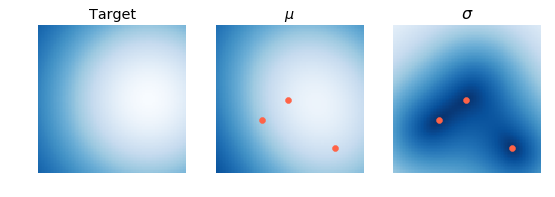

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3))
ax[0].imshow(z, cmap='Blues_r', vmin=0, vmax=1, interpolation='none', extent=[-1,1,-1,1], origin='lower')
ax[0].set_title('Target')
ax[1].imshow(mu, cmap='Blues_r', vmin=0, vmax=1, interpolation='none', extent=[-1,1,-1,1], origin='lower')
ax[1].scatter(X_sample[:,0], X_sample[:,1], color='tomato')
ax[1].set_title('$\mu$')
ax[2].imshow(std, cmap='Blues_r', vmin=0, vmax=1, interpolation='none', extent=[-1,1,-1,1], origin='lower')
ax[2].scatter(X_sample[:,0], X_sample[:,1], color='tomato')
ax[2].set_title('$\sigma$', fontsize=16)
for obj in ax:
    obj.axis('off')
plt.show()